<a href="https://colab.research.google.com/github/minhducvo04/Math_Monsters/blob/main/Merging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Install dependencies
!pip install openai
!pip install llama-index
!pip install python-dotenv
!pip install wolframalpha
!pip install EbookLib html2text
!pip install gradio
!pip googledrivedownloader
!pip install boto3
!pip install botocore
# !pip install sagemaker
# !pip install awscli


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.5/115.5 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 9.5 MB/s 

In [4]:
# Import dependencies
import openai
import os
import llama_index
from openai import OpenAI
from google.colab import userdata
from llama_index.core import SimpleDirectoryReader, GPTVectorStoreIndex

import requests
import numpy as np
# prompt: read an image from a file and convert it so that the openai gpt can read it
from io import BytesIO
import base64
from openai import OpenAI
import gradio as gr
from google.colab import userdata
import json
import os
import io
import sys

import string
import boto3
from PIL import Image
import botocore
import random

boto3_bedrock = boto3.client('bedrock-runtime', region_name='us-west-2', aws_access_key_id=userdata.get('AWS_ACCESS_KEY_ID'), aws_secret_access_key=userdata.get('AWS_SECRET_ACCESS_KEY'))

In [5]:
ID_list = []
MaMo_dict = {}
def ID(existing_strings = ID_list, length=10):
  '''
    Generating random string with given length for ID
  '''
  while True:
      random_string = ''.join(random.choices(string.ascii_letters + string.digits, k=length))
      if random_string not in existing_strings:
          existing_strings.append(random_string)
          return random_string

In [10]:
class MaMo():
  def __init__(self, ID = ID(), new = True):
    self.multiplier = 1
    self.numbers = list(range(10))
    self.elements = [
        "Fire",
        "Water",
        "Earth",
        "Air",
        "Electric",
        "Grass",
        "Ice",
        "Psychic",
        "Dark",
        "Light"
    ]
    self.body_shapes = [
        "Animal-like",
        "Insect-like",
        "Humanoid",
        "Mythical",
        "Robotic"
    ]
    self.color_schemes = [
        {"Primary": ["Red"], "Secondary": ["Orange"]},        # Fire
        {"Primary": ["Blue"], "Secondary": ["Teal"]},         # Water
        {"Primary": ["Brown"], "Secondary": ["Green"]},       # Earth
        {"Primary": ["White"], "Secondary": ["Gray"]},        # Air
        {"Primary": ["Yellow"], "Secondary": ["Black"]},      # Electric
        {"Primary": ["Green"], "Secondary": ["Yellow"]},      # Grass
        {"Primary": ["Light Blue"], "Secondary": ["White"]},  # Ice
        {"Primary": ["Purple"], "Secondary": ["Pink"]},       # Psychic
        {"Primary": ["Black"], "Secondary": ["Purple"]},      # Dark
        {"Primary": ["Gold"], "Secondary": ["White"]}         # Light
    ]

    self.accessories = [
        "Wings",
        "Horns",
        "Tail",
        "Armor",
        "Jewelry",
        "Spikes",
        # "Cloak",
        # "Helmet",
        # "Shield",
        # "Gloves",
        # "Boots",
        # "Staff",
        # "Saddle",
        # "Scarf"
    ]
    self.special_effects = [
        "Glowing Eyes",      # Fire
        "Water Droplets",    # Water
        "Sparkles",          # Air
        "Leaves",            # Grass
        "Frost Aura",        # Ice
        "Psychic Waves",     # Psychic
        "Shadow Aura",       # Dark
        "Light Rays",        # Light
        "Electric Sparks",   # Electric
        "Rock Fragments"     # Earth
    ]
    self.rarity = [
        "Common",
        "Uncommon",
        "Rare",
        "Epic",
        "Legendary"
    ]
    self.levels = [
        "Very small size, basic form, 1 element",
        "Small size, more details, 1 accessory, 1 element",
        "Medium size, 1 accessory, 1 special effect, 1 element",
        "Large size, 1 accessories, 1 special effect, 2 elements",
        "Very large size, 4 accessories, 2 special effect, 2 elements"
    ]

    self.characteristics_list = {"numbers": self.numbers, "elements": self.elements, "body shapes": self.body_shapes, "color schemes": self.color_schemes, "accessories": self.accessories, "special effects": self.special_effects, "rarity": self.rarity, "levels": self.levels}
      # element = self.elements[random.randint(1, len(self.elements))]
      # body_shape = self.body_shapes[random.randint(1, len(self.body_shapes))]
      # # accessory = accessories[random.randint(1, len(accessories))]
      # # special_effect = special_effects[random.randint(1, len(special_effects))]
      # # rarity_level = rarity[random.randint(0, len(rarity) - 1)]
      # # level = levels[random.randint(1, len(levels))]

    # color_scheme = self.color_schemes.get(element, {"Primary": "Unknown", "Secondary": "Unknown"})
    if new:
      self.ID = ID
      MaMo_dict[ID] = self
      value = random.randint(0, 9)
      self.characteristics = {
          "Number": [value],
          "Element": [self.characteristics_list['elements'][value]],
          "Body Shape": self.randomize(key = "body shapes"),
          "Accessory": [],
          "Special Effect": [],
          "Rarity": 0,
          "Level": 0,
          "Color Scheme": [self.characteristics_list['color schemes'][value]]
      }
      self.image_generation()
    else:
      with open(f'Data/{self.ID}/Config_{self.ID}.json', 'r') as json_file:
        self.characteristics = json.load(json_file)
      MaMo_dict[self.ID] = self

  def randomize(self, num = 1, ex = [], key = 'elements'):
    elems = sorted(random.sample(range(0, len(self.characteristics_list[key]) - len(ex)), num))
    li = [elem for elem in self.characteristics_list[key] if elem not in ex]
    # ex_num = 0
    # elem = 0
    # while elem < len(elems) and ex_num < len(ex):
    #   if(elem > ex[])
    return [li[elem] for elem in elems]

  def level_up(self):
    self.characteristics["Level"] += 1
    chance = random.randint(1, 1600)
    if self.characteristics["Level"] == 1:
      self.characteristics["Accessory"] += self.randomize(key = "accessories")
      # chance = random.randint(1, 16)
      if chance <= 1600:
        self.characteristics["Rarity"] += 1
        # self.characteristics["Special Effect"] += [self.characteristics_list["special effects"][self.characteristics["Number"][0]]]
    elif self.characteristics["Level"] == 2:
      # self.characteristics["Accessory"] += self.randomize(num = 2, ex = self.characteristics["Accessory"], key = "accessories")
      self.characteristics["Special Effect"] += [self.characteristics_list["special effects"][self.characteristics["Number"][0]]]
      # chance = random.randint(1, 16)
      if chance <= 800:
        self.characteristics["Rarity"] += 1
        # self.characteristics["Special Effect"] += [self.characteristics_list["special effects"][self.characteristics["Number"][0]]]
    elif self.characteristics["Level"] == 3:
      # self.characteristics["Accessory"] += self.randomize(num = 3, ex = self.characteristics["Accessory"], key = "accessories")
      self.characteristics["Number"] += self.randomize(ex = self.characteristics["Number"], key = "numbers")
      self.characteristics["Element"] += [self.characteristics_list["elements"][self.characteristics["Number"][1]]]
      self.characteristics["Color Scheme"][0]["Primary"] += [self.characteristics_list["color schemes"][self.characteristics["Number"][1]]["Primary"]]
      self.characteristics["Color Scheme"][0]["Secondary"] += [self.characteristics_list["color schemes"][self.characteristics["Number"][1]]["Secondary"]]
      # chance = random.randint(1, 16)
      if chance <= 400:
        self.characteristics["Rarity"] += 1
        # self.characteristics["Special Effect"] += [self.characteristics_list["special effects"][self.characteristics["Number"][0]]]
    elif self.characteristics["Level"] == 4:
      self.characteristics["Accessory"] += self.randomize(num = 3, ex = self.characteristics["Accessory"], key = "accessories")
      self.characteristics["Special Effect"] += [self.characteristics_list["special effects"][self.characteristics["Number"][1]]]
      # chance = random.randint(1, 16)
      if chance <= 200:
        self.characteristics["Rarity"] += 1
        # self.characteristics["Special Effect"] += [self.characteristics_list["special effects"][self.characteristics["Number"][0]]]
    self.image_generation()

  def __str__(self):
    s = ""
    for key in self.characteristics.keys():
      try:
        s += f"{key}: "
        for elem in self.characteristics[key]:
          s += f"{elem}, "
        s += "\n"
        # s += f"{key}: {self.characteristics[key]}\n"
      except:
        s += f"{self.characteristics[key]}\n"
    return s
    return f"{self.characteristics}"

  def config(self):
    return self.characteristics

  def hint(self):
    self.multiplier *= 0.9

  def wrong(self):
    self.multiplier *= 0.8

  def streak(self):
    self.multiplier *= 1.1

  def memory(self):
    '''
      Update local memory with the data from the current MaMo
    '''
    # f"Data/{temp}/image_{temp}.png"
    with open(f'Data/{self.ID}/Config_{self.ID}.json', 'w') as json_file:
      json.dump(self.config(), json_file, indent=4)

  def display(self):
    '''
      Display its image
    '''

  def create_image_prompt(self):
    '''
      Creating prompt to generate image by GPT-4o
    '''
    prompt = (
        f"""
        Given the following characteristics of a creature, generate a detailed and visually rich prompt for creating an image.
        Make sure to include the appearance, colors, accessories, special effects, and overall feel of the creature based on its rarity and level
        Here are the characteristics:
        {self.config()} and {self.characteristics_list['levels'][self.characteristics['Level']]}.
        """
    )

    model = OpenAI(api_key = userdata.get('OPENAI_API_KEY'))
    response = model.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system",
          "content": [
            {
                "type": "text",
                "text": "You are a creative artist specializing in generating detailed and vivid descriptions for images based on given characteristics."
            }]
        },
        {"role": "user",
        "content": [
            {
                "type": "text",
                "text": prompt
            }]
        }
    ],
    max_tokens=1024,
    temperature=0.9,
    )
    return response.choices[0].message.content.strip()

  def image_generation(self):
    '''
      Generating image using Stable Diffusion XL from Stability AI with Bedrock
      The code is inspired by bedrock sample code (https://github.com/aws-samples/amazon-bedrock-workshop/blob/98b8fe34325a8b40b4817cd9ace03b9c927b2b16/04_Image_and_Multimodal/bedrock-stable-diffusionXL.ipynb)
    '''
    prompt = self.create_image_prompt()#"create one Level 5 Legendary creature with a Fire element. The creature is large in size, with intricate design and dynamic color effects. It has a dragon-like body shape with vivid red and orange scales, large flaming wings, and glowing eyes. The creature features detailed accessories such as golden armor and a crown made of flames. It should have special effects like a flame aura surrounding its body, with sparkles and embers floating around. The overall appearance should be majestic and awe-inspiring."
    negative_prompts = [
        "poorly rendered",
        "poor background details",
        "multiple creatures",
        "poorly drawn creatures",
        "disfigured creatures"
    ]
    style_preset = "anime"  # (e.g. photographic, digital-art, cinematic, ...)
    clip_guidance_preset = "FAST_GREEN" # (e.g. FAST_BLUE FAST_GREEN NONE SIMPLE SLOW SLOWER SLOWEST)
    # sampler = "K_DPMPP_2S_ANCESTRAL" # (e.g. DDIM, DDPM, K_DPMPP_SDE, K_DPMPP_2M, K_DPMPP_2S_ANCESTRAL, K_DPM_2, K_DPM_2_ANCESTRAL, K_EULER, K_EULER_ANCESTRAL, K_HEUN, K_LMS)
    width = 768
    request = json.dumps({
        "text_prompts": (
            [{"text": prompt, "weight": 1.0}]
            + [{"text": negprompt, "weight": -1.0} for negprompt in negative_prompts]
        ),
        "cfg_scale": 5,
        "seed": 42,
        "steps": 60,
        "style_preset": style_preset,
        "clip_guidance_preset": clip_guidance_preset,
        "width": width,
    })
    modelId = "stability.stable-diffusion-xl-v1"
    # boto3
    response = boto3_bedrock.invoke_model(body=request, modelId=modelId, )
    response_body = json.loads(response.get("body").read())

    print(response_body["result"])
    base_64_img_str = response_body["artifacts"][0].get("base64")
    os.makedirs(f"Data/{self.ID}/", exist_ok=True)
    self.image = Image.open(io.BytesIO(base64.decodebytes(bytes(base_64_img_str, "utf-8"))))
    self.image.save(f"Data/{self.ID}/image_{self.ID}.png")
    # display(self.image)
    # return temp

  def display(self):
    '''
      Display its image
    '''
    display(self.image)

  def image(self):
    return self.image

In [7]:
default_headers = {
  'app_id': userdata.get('APP_ID'),
  'app_key': userdata.get('APP_KEY'),
  'Content-type': 'application/json'
}

service = 'https://api.mathpix.com/v3/latex'

assistant_message = r"""\documentclass{article}
\usepackage{amsmath}

\begin{document}

\section*{Evaluating the Definite Integral}

The given problem is to evaluate the definite integral \(\int_{0}^{3} x^{3} \, dx\). Let's go through the correct steps to solve this problem.

\section*{1. Correct Antiderivative}

To find the antiderivative of \( x^3 \):

\[
\int x^3 \, dx = \frac{x^4}{4} + C
\]

\section*{2. Evaluate the Definite Integral}

Next, we evaluate the definite integral from 0 to 3:

\[
\int_{0}^{3} x^3 \, dx = \left. \frac{x^4}{4} \right|_{0}^{3}
\]

\section*{3. Substitute the Limits}

Substitute the upper and lower limits into the antiderivative:

\[
\left. \frac{x^4}{4} \right|_{0}^{3} = \frac{3^4}{4} - \frac{0^4}{4}
\]

\section*{4. Calculate the Values}

Calculate the values of the expression:

\[
\frac{3^4}{4} = \frac{81}{4}, \quad \frac{0^4}{4} = 0
\]

Therefore, the value of the definite integral is:

\[
\frac{81}{4} - 0 = \frac{81}{4}
\]

\end{document}"""

assistant_message2 = r"""**Problem:**

Evaluate the integral:

\[
\int_{0}^{1} x^2 \, dx
\]

**Proposed Solution:**

\[
\int_{0}^{1} x^2 \, dx = \frac{1}{3}
\]

**Evaluation:**

Let's evaluate the integral step-by-step to verify the solution.

First, we find the antiderivative of \(x^2\):

\[
\int x^2 \, dx
\]

The antiderivative is found by using the power rule of integration:

\[
\int x^n \, dx = \frac{x^{n+1}}{n+1} + C
\]

For \(x^2\), we have:

\[
\int x^2 \, dx = \frac{x^{2+1}}{2+1} = \frac{x^3}{3}
\]

Next, we evaluate this antiderivative from 0 to 1:

\[
left[ \frac{x^3}{3} right]_{0}^{1}
\]

Calculating the values:

\[
\left. \frac{x^3}{3} \right|_{0}^{1} = \frac{1^3}{3} - \frac{0^3}{3} = \frac{1}{3} - 0 = \frac{1}{3}
\]

The proposed solution correctly follows the integration steps and correctly evaluates the definite integral.

**Final Answer:**

\[
\int_{0}^{1} x^2 \, dx = \frac{1}{3}
\]

Correct
"""

def image_uri(filename):
  """
    Return the base64 encoding of an image with the given filename.
  """
  image_data = open(filename, "rb").read()
  return "data:image/jpg;base64," + base64.b64encode(image_data).decode()

def latex(args, headers=default_headers, timeout=30):
  """
    Call the Mathpix service with the given arguments, headers, and timeout.
  """
  r = requests.post(service,
      data=json.dumps(args), headers=headers, timeout=timeout)
  return json.loads(r.text)

In [12]:
def numpy_to_base64(img_array):
  img = Image.fromarray(img_array.astype('uint8'), 'RGB')
  buffered = BytesIO()
  img.save(buffered, format="PNG")
  img_bytes = buffered.getvalue()
  img_base64 = base64.b64encode(img_bytes).decode('utf-8')

  return img_base64

def format_latex(text):
  text = text.replace('[', '$').replace(']', '$')
  text = text.replace('\\[', '$$').replace('\\]', '$$')
  return text

def request_gpt(to_process):
  model = OpenAI(api_key = userdata.get('OPENAI_API_KEY'))
  response = model.chat.completions.create(
  model="gpt-4o",
  messages=[
      {"role": "system",
        "content": [
          {
              "type": "text",
              "text": f"""You are a math problem evaluator for kids. You will provide concise and accurate answers. You will receive a math problem as input along with a proposed solution that is easy for kids to understand. Your task is to determine if the final answer is correct, but do not display any information until you finish calculating. If the answer is correct, end your response with 'Correct' after you finish processing and calculating, followed by an explanation in Markdown format. You will want to explain and elaborate more on the intermediary steps if the working provided is not satisfactory. If the answer is incorrect, end your response with 'Incorrect' followed by a detailed explanation in Markdown format on what is wrong with the solution and how it should be solved correctly. Always format your responses in Markdown, ensuring to use appropriate LaTeX formatting for mathematical expressions. Be accurate with the LaTeX. Make sure that the delimiters are correct. Here is an example of perfect LaTeX: {assistant_message}"""
              }]
      },
      {
          "role": "user",
          "content": [
              {
                  "type": "text",
                  "text": "Here is the problem: \[\int_{0}^{1} x^2 \, dx = \frac{1}{3}\]. Can you identify if my working is correct? if it is not, can you tell me what went wrong and explain step by step and what should have been done to reach the correct answer? You may use LaTeX format. "
              }
          ]
      },
      {"role": "assistant",
        "content": [
          {
              "type": "text",
              "text": assistant_message2
          }
        ]
      },
      {"role": "user",
      "content": [
          # {
          #     "type": "image_url",
          #     "image_url": {"url": f"data:image/jpeg;base64,{img}"}
          # },
          {
              "type": "text",
              "text": f"Here is the problem: {to_process}. Can you identify if my working is correct? if it is not, can you tell me what went wrong and explain step by step and what should have been done to reach the correct answer? You may use LaTeX format. ",
          }]
      }
  ],
  max_tokens=1024,
  temperature=0.9,
  )
  # print(response)
  message = response.choices[0].message
  message_text = message.content
  # print(message_text)
  return message_text

def read_image(input_img):
  img = numpy_to_base64(input_img)

  to_process = latex(args = {
      'src': f"data:image/png;base64,{img}",
      'ocr': ['math', 'text'],
      'skip_recrop': True,
      'formats': ['text', 'latex_styled', 'asciimath', 'mathml'],
      'format_options': {
          'text': {
              'transforms': ['rm_spaces', 'rm_newlines'],
              'math_delims': ['$', '$']
          },
          'latex_styled': {'transforms': ['rm_spaces']}
      }
  })['text']

  message_text = request_gpt(to_process)

  if message_text.endswith("Correct"):
    print("yes")
  else:
    print("no")

  formatted_message_text = format_latex(message_text)

  return to_process, formatted_message_text

def display_stored_image():
  return "/content/test_image3.png"

def start():
  image_display = gr.Interface(
    fn=display_stored_image,
    inputs=None,
    outputs=gr.Image(),
    title="Question to Solve",
    description="Please solve the question either on paper or on your tablet."
  )

  input_processing = gr.Interface(fn=read_image, inputs=["image"], outputs=[gr.Markdown(latex_delimiters = [{"left": "$", "right": "$"}]), gr.Markdown(latex_delimiters = [{"left": "$", "right": "$"}])])
  demo = gr.TabbedInterface([image_display, input_processing], ["Question", "Submission"])
  demo.launch(share=True, debug = True)

success
success
Number: 3, 
Element: Air, 
Body Shape: Mythical, 
Accessory: Horns, 
Special Effect: 
Rarity: 1
Level: 1
Color Scheme: {'Primary': ['White'], 'Secondary': ['Gray']}, 



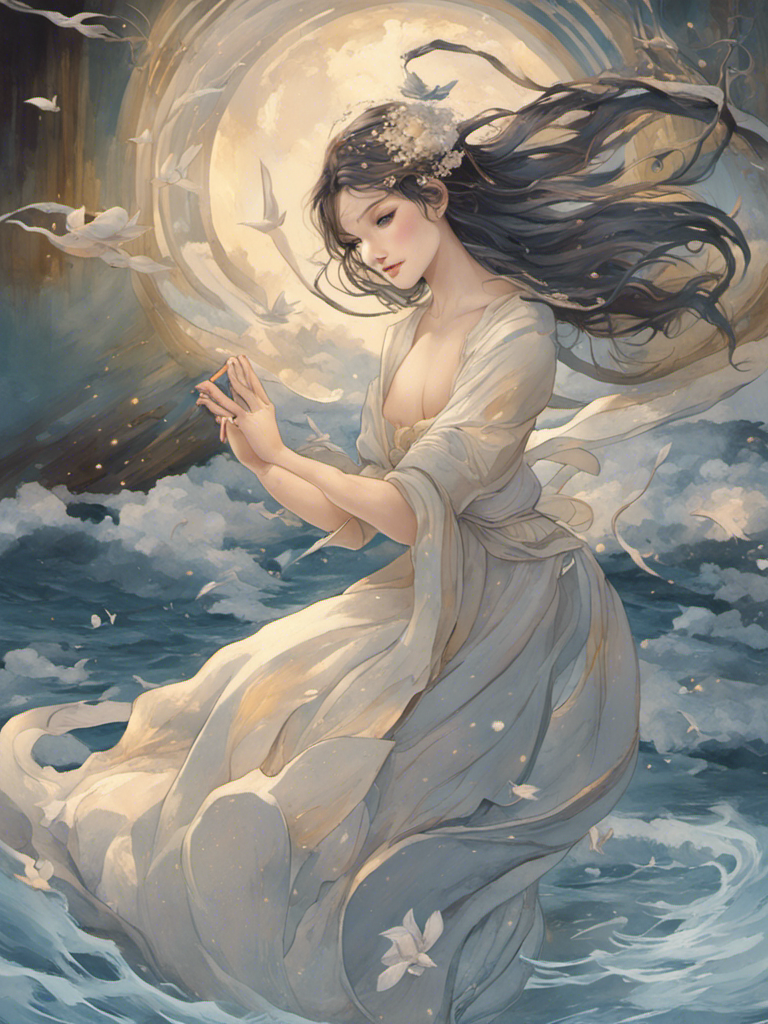

success
Number: 3, 
Element: Air, 
Body Shape: Mythical, 
Accessory: Horns, 
Special Effect: Leaves, 
Rarity: 2
Level: 2
Color Scheme: {'Primary': ['White'], 'Secondary': ['Gray']}, 



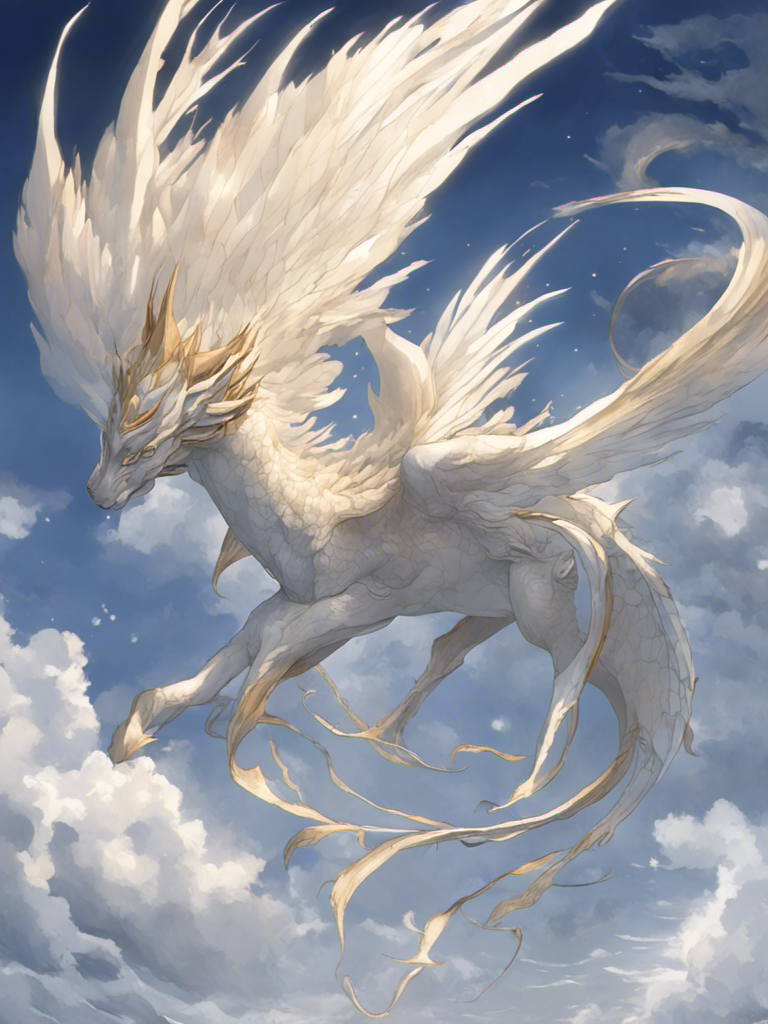

KeyboardInterrupt: 

In [9]:
# Trying a batch of 100 level 5 MaMo
for i in range(2):
  a = MaMo()
  for j in range(4):
    a.level_up()
  # if not (a.config()["Rarity"] - 4):
    print(a)
  #   print(a.characteristics_list["color schemes"])
    a.display()
    # a.image_generation()
    # a.memory()


In [ ]:
# # prompt: import wolfram alpha

# import wolframalpha
# import asyncio
# # Replace 'YOUR_APP_ID' with your Wolfram Alpha App ID
# app_id = userdata.get('WOLFRAM_ALPHA_API_KEY')

# # Create a Wolfram Alpha client
# client = wolframalpha.Client(app_id)

# # Query Wolfram Alpha
# # result = client.query("What is the meaning of life?")
# # async def get_wolfram_alpha_result(query):
# #     result = await client.query(query)
# #     return result

# # Running the async function within an already running event loop
# query = input()
# import multiprocessing as mp
# pool = mp.Pool(processes=1)
# x = pool.apply_async(client.query, (query, ))
# pool.close()
# pool.join()
# # x.get()['pod'][0]['subpod']['plaintext']
# print(x.get())
# # loop = asyncio.get_event_loop()
# # result = loop.run_until_complete(get_wolfram_alpha_result(query))
# # result = client.query(query)
# # Print the result
# # print(result)
# # Print the result
# # print(result['pod'][0]['subpod']['plaintext'])


In [ ]:
start()

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://8b6a15e8d54d4a7d8a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


no
